# Feature Engineering
Feature Engineering adalah salah satu teknik ataupun proses dimana kita menerapkan pengetahuan yang kita punya untuk mendapatkan informasi dari data yang telah kita punya. Teknik atau metode ini bisa kita terapkan untuk menambahkan akurasi model yang akan kita buat nantinya

## Pendahuluan

### Dataset yang Digunakan
Dalam pembahasan kali ini kiita akan menggunakan dataset yang terkenal dan seringkali digunakan. Dataset ini bisa kita dapatkan dari salah satu situs tentang data science terbesar yaitu [**Kaggle**](https://www.kaggle.com/)

### Import Library yang Dibutuhkan


In [ ]:
import numpy as np # Untuk memudahkan operasi komputasi data
import pandas as pd # Untuk proses dataframe dan csv
import matplotlib.pyplot as plt # Untuk plotting grafik
import seaborn as sns # Untuk plotting grafik

# Sklearn untuk machine learning model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Import Dataset
Dataset yang akan kita gunakan ini terdiri dari 2 dataset yaitu **titanic_train.csv** dan **titanic_test.csv**.

Nantinya kita akan menggunakan kedua dataset ini. **Data train** akan digunakan untuk melatih model machine learning kita dan **Data Test** nantinya akan kita gunakan untuk mengetahui akurasi model yang sudah kita buat.

In [ ]:
# Read dataset
df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')

Setelah itu kita perlu menggabungkan kedua dataset dengan membuat *function*

In [ ]:
# Membuat fungsi penggabungan dataset
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

# Menjalankan fungsi penggabungan
df_all = concat_df(df_train, df_test)

In [ ]:
# Memberi nama tiap dataframe agar mudah dipanggil
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

### Penjelasan dari dataset
Berdasarkan informasi dari sumber dataset, berikut ini adalah penjelasan dari masing-masing kolom yang ada di dataset:

- Passengerid adalah id pada baris data
- Survived adalah kolom yang menjelaskan apakah penumpang selamat atau tidak. Nilai **0=Tidak Selamat** dan **1=Selamat**
- Pclass (Passenger Class) adalah kategori level sosial ekonomi penumpang:
  - 1 = Upper Class
  - 2 = Middle Class
  - 3 = Lower Class
- Name, Sex, dan Age merupakan data *self-explanatory*
- SibSp adalah jumlah saudara ataupun pasangan dari penumpang
- Parch adalah jumlah orang tua dan/atau anak dari penumpang
- Ticket adalah jumlah tiket penumpang
- Fare adalah tarif yang dikenakan kepada penumpang
- Cabin adalah nomor kabin penumpang
- Embarked adalah pelabuhan keberangkatan penumpang:
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

Untuk mengetahui lebih jelasnya bisa dilihat di [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic/data)

## Exploratory Data Analysis (EDA)

In [ ]:
# Melihat bentuk dataframe
print('Jumlah Contoh Pelatihan = {}'.format(df_train.shape[0]))
print('Jumlah Contoh Tes = {}\n'.format(df_test.shape[0]))
print('Bentuk Dataframe Pelatihan = {}'.format(df_train.shape))
print('Bentuk Dataframe Tes = {}'.format(df_test.shape))
print(df_train.columns)
print(df_test.columns)

Jumlah Contoh Pelatihan = 891
Jumlah Contoh Tes = 418

Bentuk Dataframe Pelatihan = (891, 12)
Bentuk Dataframe Tes = (418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Jika kita lihat lagi lebih jeli, ada perbedaan jumlah kolom antara Dataframe Pelatihan dan Dataframe Tes. Jika pada Dataframe Pelatihan ada kolom ***Survived*** dan di Dataframe Tes tidak ada. Hal tersebut bukanlah kesalahan karena memang tugas kita lah nanti membuat kolom dan data kolom ***Survived*** dengan memprediksi berdasarkan model yang nanti akan kita buat.

In [ ]:
# Melihat tipe data pada kolom, jumlah data non-null, dan lain-lain
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Melihat korelasi antar kolom
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


Semakin tinggi angkanya maka semakin tinggi juga korelasinya.

Pada data ini dapat kita lihat bahwa kolom ***Survived*** sangat besar korelasinya dengan kolom ***Pclass*** dan ***Fare***. Di sisi lain kolom ***Age*** sangat berkaitan dengan ***Pclass***, ***Sibling Spouse (SibSp)***, dan ***Parent Children (Parch)***.

Dari korelasi yang ada bisa kita asumsikan bahwa kebanyakan orang yang selamat adalah orang dengan PClass atas. Selain itu, semakin tua seseorang maka akan cenderung untuk memilih kelas atas dan juga memiliki saudara/orang tua/anak/pasangan.

### Missing Values

In [ ]:
# Mencari Missing Values pada data train
print('Missing Values pada data train')
print(df_train.isnull().sum())

# Mencari Missing Values pada data test
print('\nMissing Values pada data test')
print(df_test.isnull().sum())

Missing Values pada data train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values pada data test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Dari hasil tersebut kita bisa melihat adanya beberapa kolom yang masih terdapat nilai kosong (null values) seperti kolom ***Age***, ***Cabin***, dan ***Embarked*** pada dataframe training set.

### Handling Missing Values
Sebenarnya ada beberapa cara untuk mengatasi atau membersihkan nilai kosong pada dataframe. Namun untuk kasus kali ini kita akan menggunakan nilai median dan juga modus dari nilai kolom yang kosong.

#### ***Age***
Untuk mengisi data pada kolom ***Age*** yang kosong kita akan menggunakan nilai tengah umur penumpang berdasarkan kelas penumpang dan jenis kelaminnya.
Untuk melakukannya kita bisa melakukan dengan cara group by terhadap kelas penumpang dan jenis kelamin. 

In [ ]:
# Melakukan grouping berdasarkan jenis kelamin dan kelas penumpang
age_by_pclass_sex = df_all.groupby(['Sex','Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Mengganti nilai kosong di kolom Age dengan median berdasarkan jenis kelamin dan kelas penumpang
df_all['Ages'] = df_all.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


#### ***Embarked***
Untuk mengisi nilai kosong yang ada di kolom ***Embarked*** kita bisa mengisinya dengan pelabuhan yang paling banyak digunakan oleh penumpang

In [ ]:
# Mencari pelabuhan yang paling banyak digunakan oleh penumpang
mode_embarked = df_all['Embarked'].mode().values[0] 
print('Pelabuhan yang paling banyak digunakan penumpang adalah Southampton({})'.format(mode_embarked))

# Mengganti nilai yang hilang pada kolom Embarked
df_all['Embarked'] = df_all['Embarked'].fillna('S')

Pelabuhan yang paling banyak digunakan penumpang adalah Southampton(S)


#### ***Fare***
Untuk mengisi kolom ***Fare*** karena kita sebelumnya sudah tahu kalau kolom ini sangat berkaitan dengan Kelas Penumpang (Pclass), Jumlah Parent/Children (Parch), dan Jumlah Sibling/Spouse (SibSp). Sehingga kita dapat mengisinya dengan nilai tengah dari orang yang berada di grup tersebut.

In [ ]:
# Mencari nilai median berdasarkan grup
list_med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()
print(list_med_fare)

Pclass  Parch  SibSp
1       0      0         31.33960
               1         75.25000
               2         51.47920
        1      0         63.35830
               1         83.15830
        2      0         83.15830
               1        120.00000
               2        262.37500
               3        263.00000
        3      1        262.37500
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         23.00000
               1         26.25000
               2         33.00000
        2      0         26.25000
               1         41.57920
        3      0         39.00000
               1         23.00000
               2         18.75000
3       0      0          7.85420
               1         14.45625
               2         19.83960
               3         16.92500
        1      0         12.47500
               1         15

Pada kasus ini kita akan mengisi nilai kosong pada kolom ***Fare*** dengan nilai tengah dari penumpang kelas 3 yang berangkat sendiri

In [ ]:
med_fare = list_med_fare[3][0][0]
print("Nilai yang akan digunakan untuk mengganti nilai kosong pada kolom Fare adalah {}".format(med_fare))

# Mengganti nilai kosong pada kolom Fare
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

Nilai yang akan digunakan untuk mengganti nilai kosong pada kolom Fare adalah 7.8542


### Exploring Data Using Graph

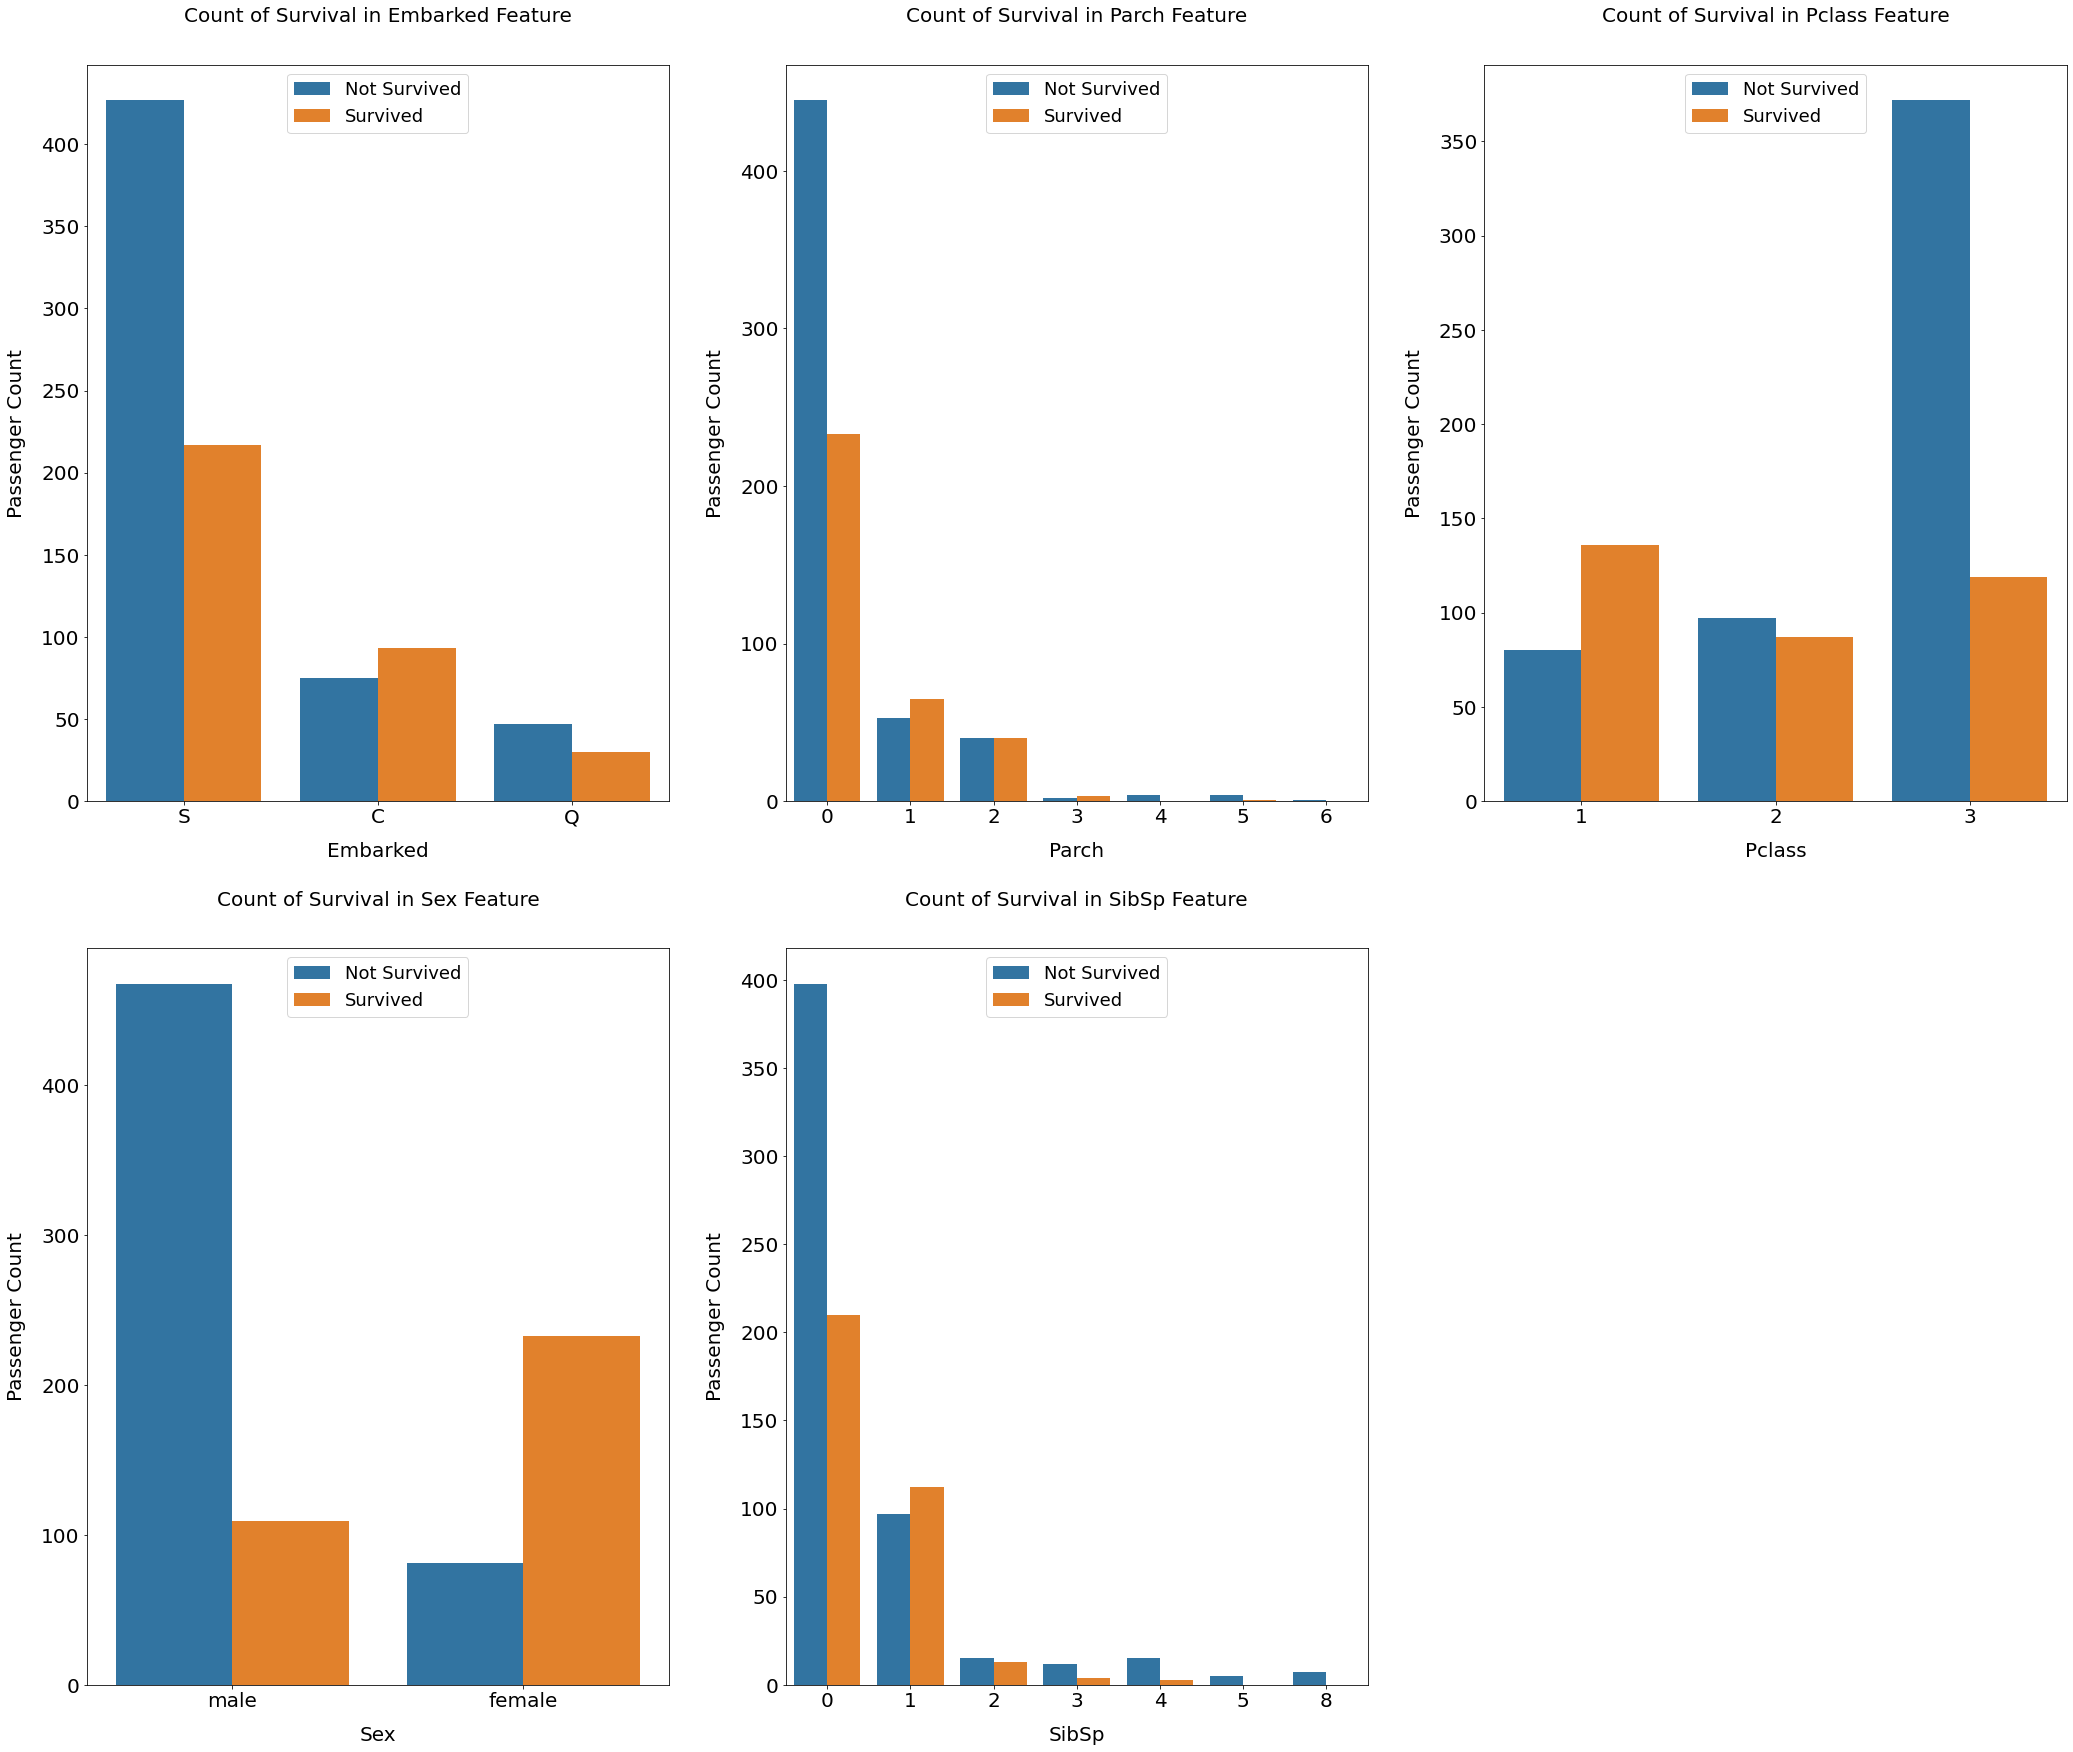

In [ ]:
# Membuat list untuk kolom kategorikal
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

# Membuat grafik menggunakan subplot
import matplotlib.pyplot as plt

cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features,1):
	plt.subplot(2, 3, i)
	sns.countplot(x=feature, hue='Survived', data=df_train)

	plt.xlabel('{}'.format(feature), size=20, labelpad=15)
	plt.ylabel('Passenger Count', size=20, labelpad=15)
	plt.tick_params(axis='x', labelsize=20)
	plt.tick_params(axis='y', labelsize=20)

	plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
	plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Dengan melihat grafik ini, kita bis mengetahui beberapa informasi, diantaranya adalah:
- Ternyata para penumpang yang berangkat dari pelabuhan **Cherbourg** memiliki rasio tingkat keselamatan tertinggi. Hal ini bisa kita lihat dari jumlah penumpang yang selamat lebih besar dibandingkan yang tidak selamat
- Penumpang yang membawa 1 Orang Tua/Anak lebih banyak yang selamat
- Penumpang yang berada di **Class 1** memiliki kemungkinan selamat yang paling tinggi dan **Class 3** memiliki peluang paling rendah
- Penumpang yang membawa 1 sauadara/pasangan memiliki kemungkinan selamat yang paling tinggi

Untuk mengeksplorasi data lebih lanjut, kita akan menggunakan fungsi `describe` untuk mengetahui rangkuman statistik dari data

In [ ]:
df_all.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ages
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000
mean,29.881138,33.276044,0.385027,655.000000,2.294882,0.498854,0.383838,29.261398
std,14.413493,51.743657,0.865560,378.020061,0.837836,1.041658,0.486592,13.218275
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.170000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,22.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,26.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,36.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,80.000000


Selanjutnya kita akan melihat grafik sebaran penumpang yang selamat berdasarkan Usianya (***Age***). Untuk melihat persebaran data yang "ideal" kita akan membagi **Age** ke dalam beberapa bin/kelompok.

Dari fungsi `describe` sebelumnya kita bisa melihat bahwa usia paling muda adalah 0.17 dan usia paling tuanya adalah 80 tahun. Dengan rentan data tersebut, saya rasa membaginya menjadi 10 kelompok atau bins itu sudah cukup. Namun ketika dicek menggunakan visualisasi, sebaran datanya belum mewakilkan dan masih adanya *skew*. Untuk mengatasinya kita bisa menambahkan ataupun mengurangi jumlah kelompok/bins nya. Pada kasus ini kita akan menambahkan jumlah kelompok/bins nya menjadi 13.


*Tidak ada aturan baku mengenai jumlah bins yang akan digunakan untuk setiap kasus. Jadi kita harus bisa menyesuaikan dengan apa yang kita inginkan dan butuhkan

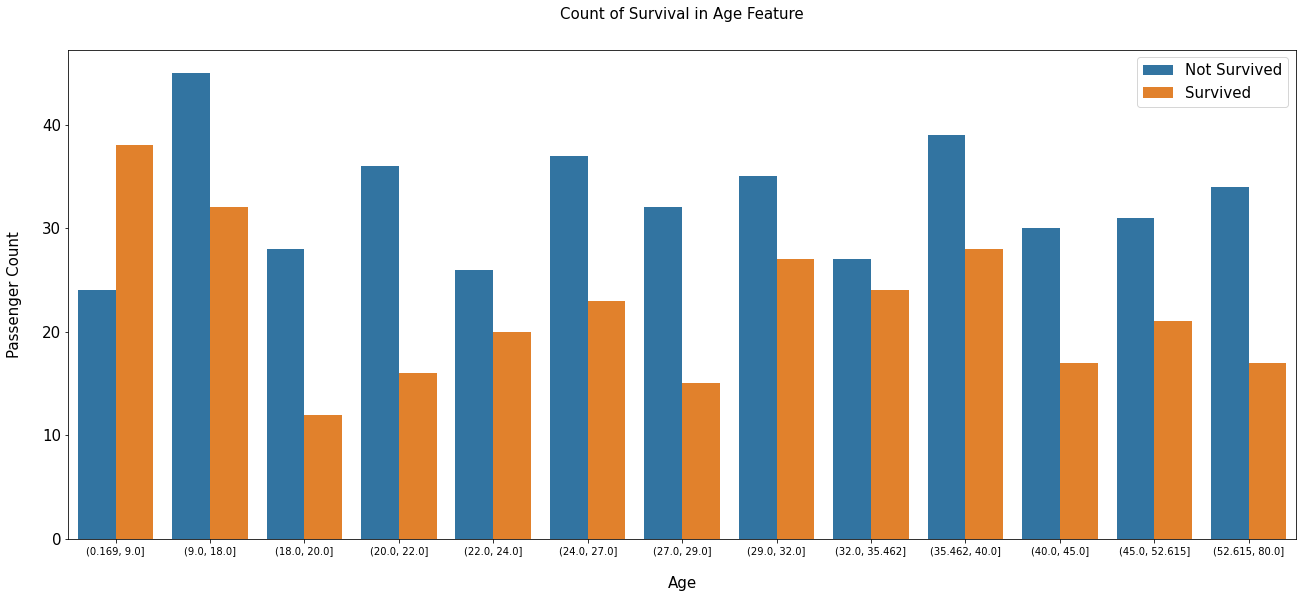

In [ ]:
df_all['Age'] = pd.qcut(df_all['Age'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

Untuk melihat persebaran data **Fare** kita akan membaginya menjadi jumlah kelompok atau bins yang sama dengan **Age**

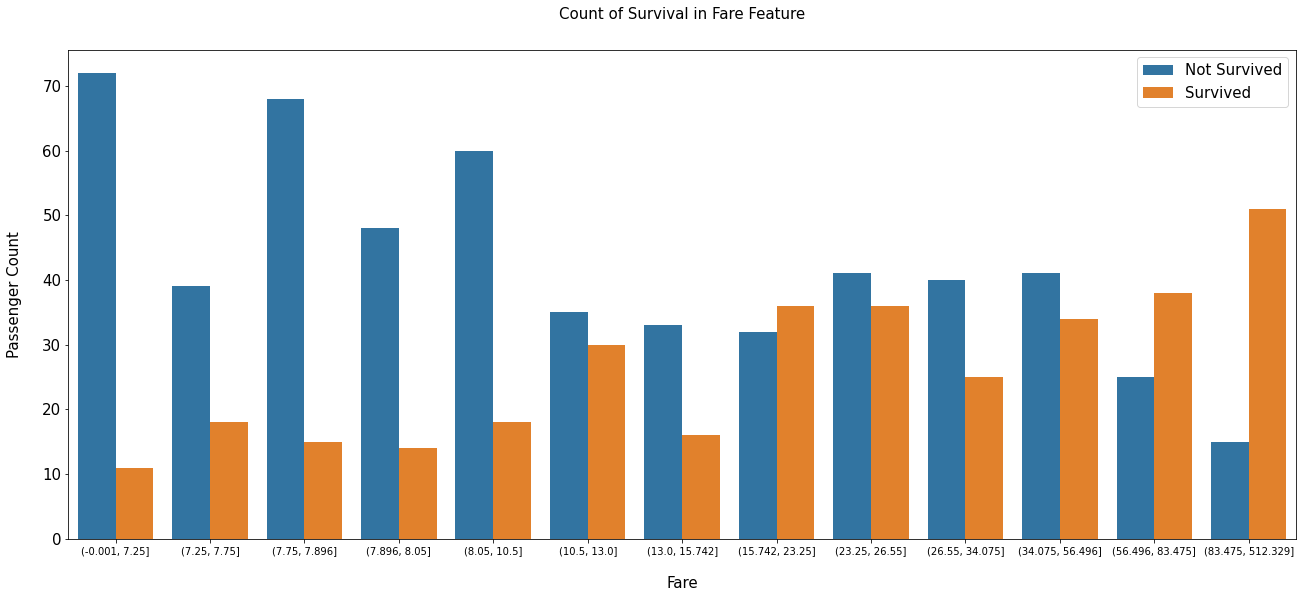

In [ ]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

## Feature Engineering
Feature Engineering adalah tentang membuat fitur baru dari fitur yang sudah ada. Dari sini kita akan membuat beberapa fitur baru yang tujuannya adalah menaikkan akurasi dari model machine learning kita.

Fitur pertama yang akan kita buat adalah ***Family_Size** yang isinya merupakan gabungan dari Parent, Child, Sibling, Spouse, dan kita tambahkan 1 dengan asumsi menghitung penumpang itu juga.

In [ ]:
# Membuat fitur Family_Size
df_all['Family_Size'] = df_all['Parch'] + df_all['SibSp'] + 1

# Mengetahui nilai distinct dari Family_Size
df_all['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

Setelah itu kita bisa membuat kategori berdasarkan jumlah keluarganya, kategorinya adalah sebagai berikut:
- Family Size 1 = **Alone**
- Family Size 2, 3, 4 = **Small**
- Family Size 5 dan 6 = **Medium**
- Family Size 7, 8, dan 11 = **Large**

In [ ]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

Setelah itu kita gambarkan plotnya

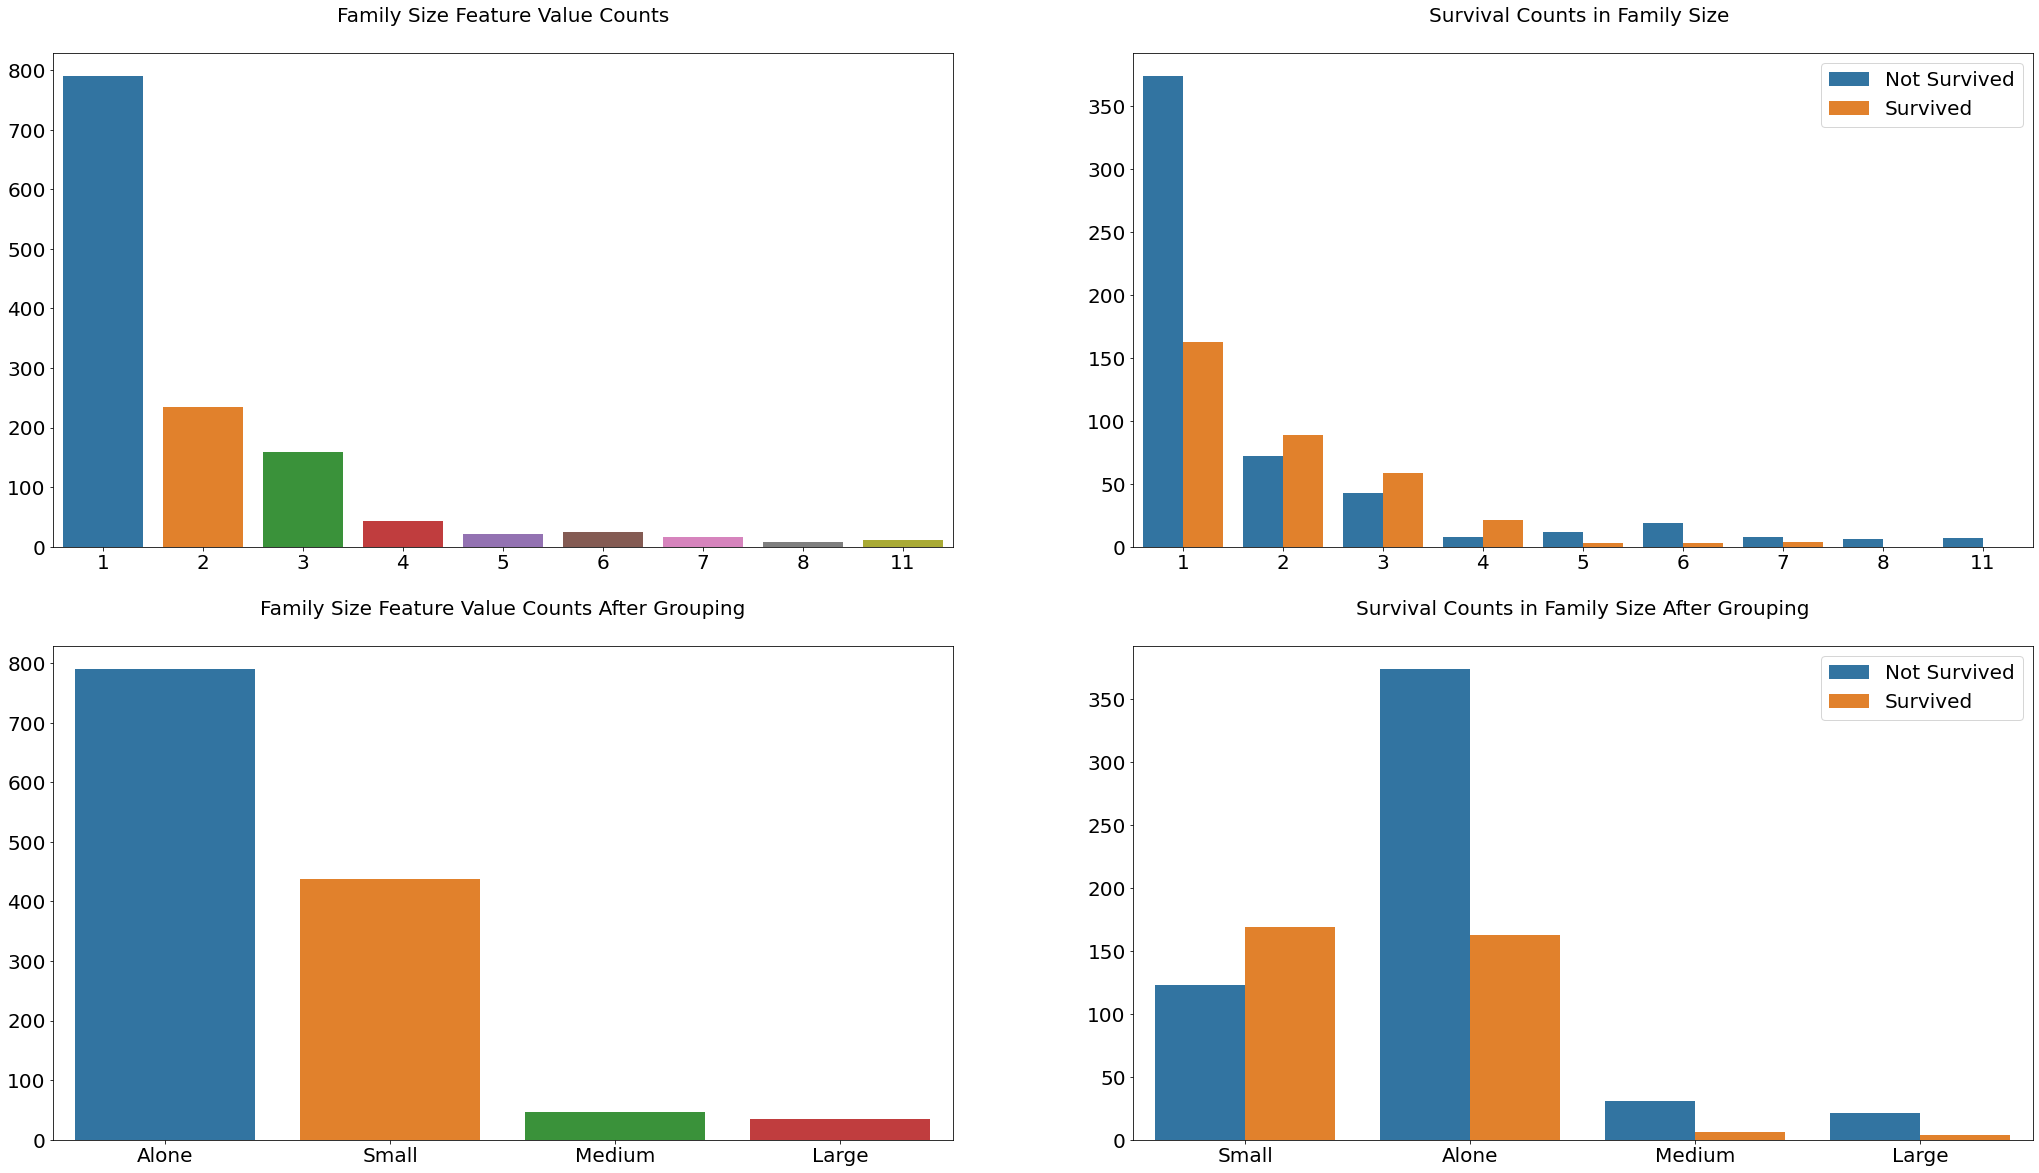

In [ ]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Pada plot di atas kita bisa melihat bahwa penumpang dengan **Family_Size** ***2, 3, dan 4*** itu memiliki kemungkinan selamat yang lebih besar. Lalu penumpang dengan **Family_Size_Grouped** ***Small*** terlihat memiliki tingkat keselamatan yang lebih besar

Selanjutnya untuk membuat fitur batu kita perlu melihat kolom name

In [ ]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ages,Family_Size,Family_Size_Grouped
0,"(20.0, 22.0]",NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,22.0,2,Small
1,"(35.462, 40.0]",C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,38.0,2,Small
2,"(24.0, 27.0]",NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,26.0,1,Alone
3,"(32.0, 35.462]",C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,35.0,2,Small
4,"(32.0, 35.462]",NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,35.0,1,Alone


Jika kita lihat pada kolom nama itu memiliki format yang sama yaitu:
[Nama Belakang], [Jabatan], [Nama Depan]

Maka dari itu kita bisa mengambil informasi jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik). Kita akan melakukannya dengan menggunakan `.split` dan mengambil nilainya menggunakan index

In [ ]:
# Split Title dari kolom nama penumpang
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Untuk mengetahui gelar apa saja yang ada
print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Ternyata banyak sekali jabatan yang ada, namun ada beberapa jabatan yang paling umum disini adalah 'Mr','Mrs', dan 'Miss'.

Dari gelar/title yang ada ini kita bisa membuat fitur baru lagi yaitu 'Is_Married'. Fitur ini nantinya akan diisi oleh penumpang yang mempunyai jabatan 'Mrs' yang berarti penumpang tersebut sudah menikah karena biasanya orang yang sudah menikah biasanya akan dipanggil dengan sebutan Mrs

In [ ]:
# Menambahkan fitur baru 'Is_Married'
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Karena cukup banyak sekali jabatan yang ada, maka kita akan coba menyederhanakannya menjadi 3 kelompok saja dengan membaginya menjadi seperti:

- ['Miss', 'Mrs', 'Ms', 'Lady', 'Mme', 'the Countess', 'Dona'] akan diubah menjadi **[Miss/Mrs/Ms]**
- ['Dr', 'Col', 'Major', 'Johnkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi **'Dr/Military/Noble/Clergy'**
- ['Mr'] tidak akan diubah

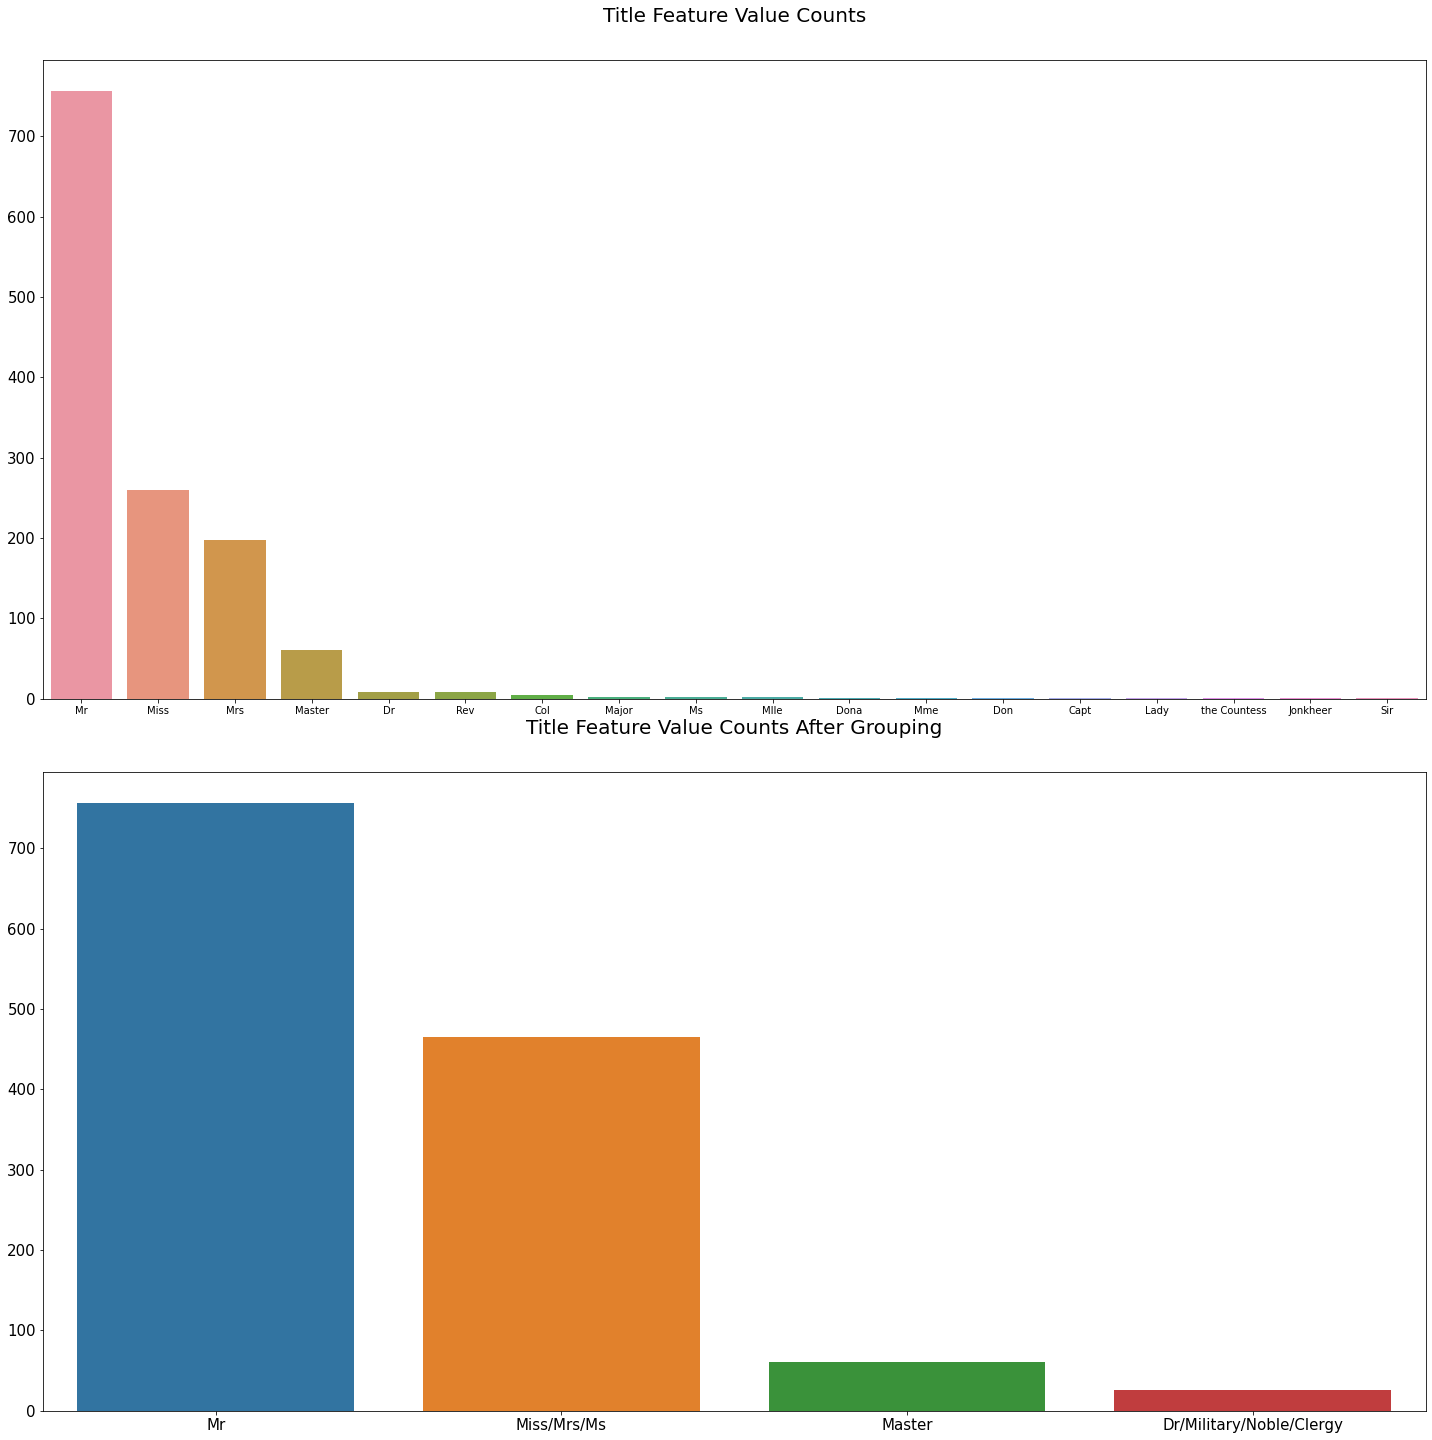

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
  axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)
plt.tight_layout()
plt.show()

Untuk melihat apa saja yang telah dilakuka dalam Feature Engineering, mari kita lihat 5 data paling awal dengan menggunakan fungsi `.head()`

In [ ]:
print(df_all.head())

              Age Cabin Embarked  ... Family_Size_Grouped        Title  Is_Married
0    (20.0, 22.0]   NaN        S  ...               Small           Mr           0
1  (35.462, 40.0]   C85        C  ...               Small  Miss/Mrs/Ms           1
2    (24.0, 27.0]   NaN        S  ...               Alone  Miss/Mrs/Ms           0
3  (32.0, 35.462]  C123        S  ...               Small  Miss/Mrs/Ms           1
4  (32.0, 35.462]   NaN        S  ...               Alone           Mr           0

[5 rows x 17 columns]


## Modelling
Karena pada kasus ini kita hanya berfokus kepada feature engineering, maka kita tidak akan membahas terlalu dalam untuk modelling. 

Pada bagian awal, kita membersihkan data dan juga mengolah data dengan menggabungkan training dataset dan juga test dataset ke df_all. Maka dari itu kita perlu membaginya kembali sesuai dengan shape awal masing-masing dataset

In [ ]:
# Membagi dataset ke shape awal
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

Selanjutnya kita akan mengubah semua kolom kategorikal menjadi numerik dengan melakukan encoding menggunakan 'LabelEncoder' agar bisa diproses oleh model yang kita buat.

In [ ]:
  # Mengubah kolom kategorikal menjadi numerik
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
# Mengubah feature kategori menjadi one hot dengan menggunakan OneHotEncoder

cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

Selanjutnya kita akan menghapus kolom-kolom yang kurang diperlukan dalam pembuatan model

In [ ]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)

print(df_all.head())

   Age  Ages  Embarked_1  Embarked_2  ...  Title_1  Title_2  Title_3  Title_4
0    2  22.0         0.0         0.0  ...      0.0      0.0      0.0      1.0
1    8  38.0         1.0         0.0  ...      0.0      0.0      1.0      0.0
2    4  26.0         0.0         0.0  ...      0.0      0.0      1.0      0.0
3    7  35.0         0.0         0.0  ...      0.0      0.0      1.0      0.0
4    7  35.0         0.0         0.0  ...      0.0      0.0      0.0      1.0

[5 rows x 22 columns]


In [ ]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))				

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)


Kita akan menggunakan RandomForestClassifier dari SkLearn dan menghitung akurasi menggunakan cross_val_score

In [ ]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82222222 0.86516854 0.7752809  0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.86516854 0.85393258]
Mean: 0.8316604244694131
Standard Deviation: 0.032887563461537754


Berikut merupakan hasil akurasi dengan menggunakan feature dari feature engineering adalah sekitar 0.832

Selanjutnya kita akan melakukan modelling tanpa menggunakan feature dari feature engineering

In [ ]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 13)
y_train shape: (891,)
X_test shape: (418, 13)


In [ ]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.82022472 0.76404494 0.88764045 0.85393258 0.80898876
 0.80898876 0.76404494 0.86516854 0.82022472]
Mean: 0.8193258426966292
Standard Deviation: 0.03829730407689471


Hasil dari akurasi model yang tidak menggunakan feature dari feature engineering adalah 0.812.

Dengan begitu dapat kita simpulkan bahwa penggunaan feature engineering dapat meningkatkan akurasi sebanyak kurang lebih 2%. Ini adalah salah satu kegunaan dari Feature Engineering.

***Note***: Akurasi ini tidak absolut dan dapat berubah tergantung dari banyaknya faktor dan juga termasuk parameter yang dimasukkan. Bahkan dalam beberapa kasus fitur yang kita buat juga bisa saja mengurangi ataupun memperburuk model yang kita buat tergantung tipe model yang digunakan

## Kesimpulan
Feature Engineering mengharuskan kita membuat banyak ide fitur dari data yang sudah ada.
Biasanya yang dapat dilakukan adalah dengan penggabungan (Grouping), ekstraksi fitur (seperti Title yang didapat dari kolom nama), dan masih banyak lainnya.
Jangan malas untuk melakukan feature engineering dan mencoba segala sesuatu yang ada di pikiran kita. Barangkali ini dapat meningkatkan akurasi model kita